# SWMAL Exercise

### MAL Group-Nr. 15
13-09-2025

| Name   | ID        |
|--------|-----------|                       
| John   | 202209849 |
| Khaled | 202307853 |
| Jahye  | 202309135 |

## Intro


We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]. So we begin with what Géron says about life satisfactions vs GDP per capita.
 
Halfway down this notebook, a list of questions for SWMAL is presented.

## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [18]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [19]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [20]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

 Volume in drive C is Windows-SSD
 Volume Serial Number is E045-588E

 Directory of c:\Users\omary\OneDrive\Documents\School - AU\6. Semester\MAL\University-MachineLearning\L01

05-09-2025  08:31    <DIR>          .
23-09-2025  14:42    <DIR>          ..
27-08-2025  19:25           864.068 datasets.zip
27-08-2025  19:25    <DIR>          Extra
27-08-2025  19:25    <DIR>          Figs
06-10-2025  11:20           289.743 intro.ipynb
01-09-2025  12:18               998 knn_cell.py
27-08-2025  19:25         5.856.271 lesson01.pdf
05-09-2025  11:37            21.590 modules_and_classes.ipynb
29-08-2025  09:28    <DIR>          mymodule
29-08-2025  10:03             5.392 solutions_qd_qe_qf_qg.py
               6 File(s)      7.038.062 bytes
               5 Dir(s)  84.122.677.248 bytes free

OK


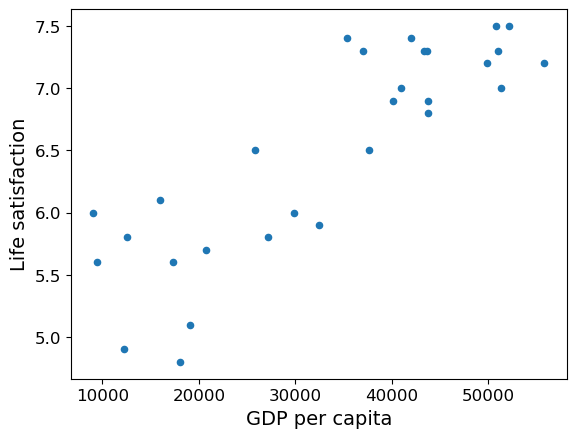

[[5.96242338]]
OK


In [21]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

## SWMAL

Now we plot the linear regression result.

Just ignore all the data plotter code mumbo-jumbo here (code take dirclty from the notebook, [GITHOML])...and see the final plot.

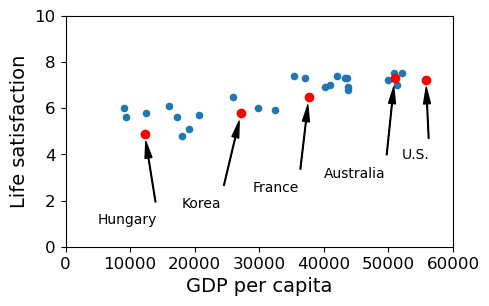

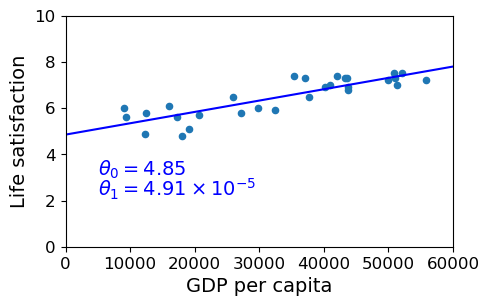

OK


In [22]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


### Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/supervised_learning.png" alt="WARNING: could not get image from server." style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}~$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

### Qa) The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model, via the models python attributes?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \textrm{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \textrm{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

What are the minimum and maximum values for $R^2~$?

Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness? 

NOTE$_1$: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

NOTE$_2$: there are different definitions of the $R^2$, 'coefficient of determination', in linear algebra. We stricly use the formulation above. 

OPTIONAL: Read the additional in-depth literature on $R^2~$:

> https://en.wikipedia.org/wiki/Coefficient_of_determination

In [23]:
# Solution for Qa: Extracting θ parameters and R² score

# 1. Extract θ₀ (intercept) and θ₁ (coefficient) from the trained linear regression model
theta_0 = model.intercept_[0]  # θ₀ - the y-intercept 
theta_1 = model.coef_[0][0]    # θ₁ - the slope coefficient

print(f" θ₀: {theta_0:.6f} (should be ≈ 4.85)")
print(f" θ₁: {theta_1:.8e} (should be ≈ 4.91e-05)")

# 2. Extract the R² score using the score method
r2_score = model.score(X, y)
print(f"R² score: {r2_score:.3f}")

# 3. Explanation of what R² measures
print("\nWhat R² Score Measures:")
print("R² (coefficient of determination) measures the proportion of variance")
print("in the dependent variable (y) that is predictable from the independent")
print("variable(s) (X).")
print("")
print("Formula: R² = 1 - (residual sum of squares) / (total sum of squares)")
print("         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²")
print("")
print("In our case: R² = 0.734 means that 73.4% of the variance in")
print("life satisfaction can be explained by GDP per capita.")

# 4. R² characteristics and interpretation
print("\nR² Characteristics:")
print("• Minimum value: -∞ (negative infinity)")
print("• Maximum value: 1.0")
print("• R² = 1.0: Perfect prediction (all variance explained)")
print("• R² = 0.0: Model performs as well as predicting the mean")
print("• R² < 0.0: Model performs worse than predicting the mean")
print("")
print("Higher R² is better:")
print("• R² is a Goodness/Fitness measure (not a loss/cost function)")
print("• We want R² to be as close to 1.0 as possible")


 θ₀: 4.853053 (should be ≈ 4.85)
 θ₁: 4.91154459e-05 (should be ≈ 4.91e-05)
R² score: 0.734

What R² Score Measures:
R² (coefficient of determination) measures the proportion of variance
in the dependent variable (y) that is predictable from the independent
variable(s) (X).

Formula: R² = 1 - (residual sum of squares) / (total sum of squares)
         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²

In our case: R² = 0.734 means that 73.4% of the variance in
life satisfaction can be explained by GDP per capita.

R² Characteristics:
• Minimum value: -∞ (negative infinity)
• Maximum value: 1.0
• R² = 1.0: Perfect prediction (all variance explained)
• R² = 0.0: Model performs as well as predicting the mean
• R² < 0.0: Model performs worse than predicting the mean

Higher R² is better:
• R² is a Goodness/Fitness measure (not a loss/cost function)
• We want R² to be as close to 1.0 as possible


##### **What are the minimum and maximum values for R²?**
- Minimum Value: R² can actually be negative, so its minimum value is theoretically −∞. This happens when the model performs worse than simply predicting the mean of the dependent variable — in other words, it fits the data worse than a flat horizontal line.
- Maximum Value: The maximum possible R² value is 1.0, representing a perfect fit where the model explains 100% of the variance in the dependent variable.

##### **Is it best to have a low or high R² score?**
En højere R² værdi er bedre, da det indikerer at modellen forklarer/fitter en større del af varians på den afhængige variable. Men en høj R² værdi betyder ikke nødvendigvis at modellen er god, fordi det også kan indikere ”overfitting”, hvis modellen er for kompleks for datasættet.


##### **Is R² a loss/cost function or a fitness/goodness measure?**
R² værdien er en målestok for fitness/goodness. Den vurderer, hvor godt modellen forklarer/fitter variansen af data. Den bruges heller ikke som loss function I modeltræningen. I stedet minimerer lineær regression typisk Residual Sum of Squares (RSS).

## The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


### Qb) Using k-Nearest Neighbors

Change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with k=3 (see p.26 3rd. [HOML]), and rerun the `fit` and `predict` using this new model.

What do the k-nearest neighbors (KNN) estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the KNN model use, and is it comparable to the linear regression model? 

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

Remember to put pointer/text from the Sckikit-learn documentation in the journal...(did you find the right KNN model etc.)

In [24]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [25]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


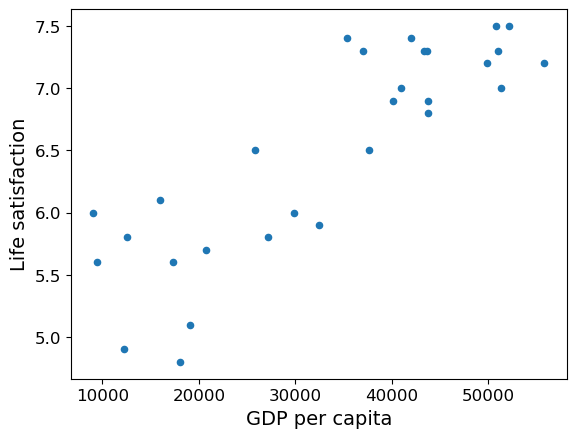

KNN prediction for Cyprus: 5.77
KNN R² score: 0.853
Linear regression prediction: 5.96
Linear regression R² score: 0.734


In [26]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y.ravel())

X_new = [[22587]]
y_pred_knn = knn.predict(X_new)
print(f"KNN prediction for Cyprus: {y_pred_knn[0]:.2f}")

knn_score = knn.score(X, y.ravel())
print(f"KNN R² score: {knn_score:.3f}")

print(f"Linear regression prediction: {y_pred[0][0]:.2f}")
print(f"Linear regression R² score: {model.score(X, y):.3f}")

The purpose of this exercise is to replace the linear regression model with the k-nearest neighbors algorithm (KNeighborsRegressor), which is another type of machine learning model.
KNN regression predicts the target value of a data point by taking the average of the target values of its k nearest neighbors in the feature space. The key parameter k determines how many neighbors are considered in the prediction. In this case, k = 3.

In this example, the KNN model predicts the life satisfaction for Cyprus by averaging the life satisfaction scores of its three nearest neighbors, which correspond to countries with similar GDP values. From the compiled code, this prediction equals 5.77.
In contrast, linear regression fits a single straight line across the entire dataset and then evaluates the prediction based on Cyprus’ GDP value. Therefore, KNN provides a more local estimate, relying on nearby data points, while linear regression provides a global estimate that generalizes across all data.

According to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?utm_source=chatgpt.com), both KNeighborsRegressor and LinearRegression use R² (the coefficient of determination) as their default scoring method when the .score() function is called.
This means the two models are directly comparable, as they both evaluate how well the model fits the given dataset using the same metric. In this case, KNN achieved an R² score of 0.853, which is higher than the linear regression R² score of 0.734, indicating that KNN provides a better fit for the data.

However, if different scoring methods were used — for example, Mean Absolute Error (MAE) or Mean Squared Error (MSE) — it would not make sense to compare them directly, since these metrics have different interpretations and scales compared to R². Therefore, comparisons between models are only meaningful when they are evaluated using the same scoring metric.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

KNN (k=1): R² train = 1.000, R² test = 0.494
KNN (k=3): R² train = 0.874, R² test = 0.003
KNN (k=9): R² train = 0.836, R² test = 0.349
KNN (k=15): R² train = 0.629, R² test = 0.555


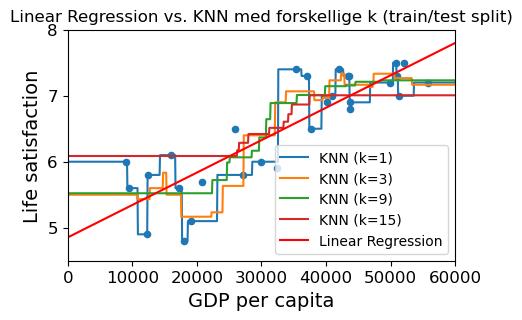

Følgende k blev sprunget over, fordi k > antal træningspunkter (23): [29]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot raw data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 4.5, 8])

# Test grid for kurver
m = np.linspace(0, 60000, 1000).reshape(-1, 1)

# Kandidater til k, men filtrér ift. antal træningspunkter
candidate_k = [1, 3, 9, 15, 29]
max_k = len(X_train)
k_values = [k for k in candidate_k if k <= max_k]

# Kør KNN for gyldige k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(m)
    plt.plot(m, y_pred, label=f"KNN (k={k})")

    r2_train = knn.score(X_train, y_train)
    r2_test  = knn.score(X_test,  y_test)
    print(f"KNN (k={k}): R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Sammenlign med lineær regression (trænet tidligere som 'model')
y_pred_lin = model.predict(m)
plt.plot(m, y_pred_lin, "r", label="Linear Regression")

plt.legend()
plt.title("Linear Regression vs. KNN med forskellige k (train/test split)")
plt.show()

# Hvis nogle k blev filtreret fra, så sig det højt
skippede = [k for k in candidate_k if k > max_k]
if skippede:
    print(f"Følgende k blev sprunget over, fordi k > antal træningspunkter ({max_k}): {skippede}")


In this section, we investigate how the choice of k affects the model’s performance when the data is split into training and test sets.

When k = 1, the model uses only the single nearest point to make a prediction. On the training data, each point predicts itself perfectly, resulting in an R² score of 1.0. However, on the test data the score drops significantly (R² = 0.49), which clearly indicates overfitting — the model memorizes the training data instead of learning a general pattern.

As k increases (for example, to k = 9 or k = 15), the predictions become smoother, as the model averages over more neighbors. This reduces overfitting but can lead to underfitting if k becomes too large.

Compared to linear regression, which fits a single global line across all data points, KNN produces more local estimates. Small k-values capture fine details (and sometimes noise), while larger k-values lead to more stable and generalizable models.

The results suggest that the best balance is achieved with intermediate k-values, where the model provides a good trade-off between accuracy on the training set and generalization to unseen data.

### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

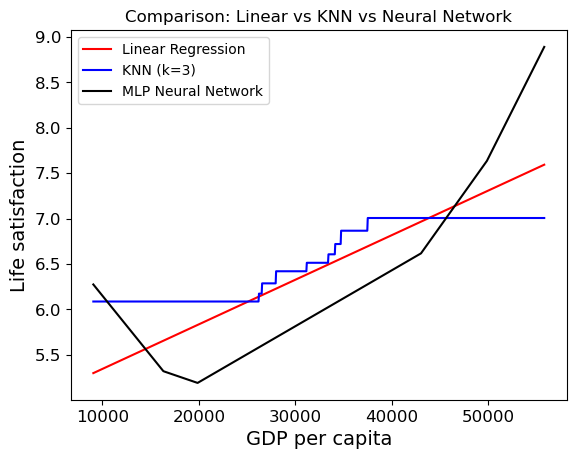


Comparison:
Linear regression - Cyprus: 5.96, R² score: 0.734
KNN (k=3)          - Cyprus: 6.09, R² score: 0.621
MLP Neural Network - Cyprus: 5.36, R² score: 0.346


In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Grid for plotting
m = np.linspace(float(X.min()), float(X.max()), 1000).reshape(-1, 1)

# Train scaled MLP
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam',
             alpha=1e-3, early_stopping=True, n_iter_no_change=20,
             tol=1e-5, max_iter=100000, random_state=42, verbose=False)
)
mlp.fit(X, y.ravel())

# Predictions on the grid
y_pred_lin = model.predict(m)          # linear regression already trained as `model`
y_pred_knn = knn.predict(m)            # KNN already trained as `knn`
y_pred_mlp = mlp.predict(m)            # MLP

# Plot
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
plt.plot(m, y_pred_mlp, "k", label="MLP Neural Network")
plt.legend()
plt.title("Comparison: Linear vs KNN vs Neural Network")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.show()

# Predict Cyprus and compare
X_new = np.array([[22587]])  # must be 2D
lin_pred = float(model.predict(X_new).ravel()[0])
knn_pred = float(knn.predict(X_new).ravel()[0])
mlp_pred = float(mlp.predict(X_new).ravel()[0])

lin_score = model.score(X, y)
knn_score = knn.score(X, y.ravel())
mlp_score = mlp.score(X, y.ravel())

print("\nComparison:")
print(f"Linear regression - Cyprus: {lin_pred:.2f}, R² score: {lin_score:.3f}")
print(f"KNN (k=3)          - Cyprus: {knn_pred:.2f}, R² score: {knn_score:.3f}")
print(f"MLP Neural Network - Cyprus: {mlp_pred:.2f}, R² score: {mlp_score:.3f}")


In this section, a neural network model (MLPRegressor) is trained to predict life satisfaction based on GDP per capita.
The model uses one hidden layer with 10 neurons and the ReLU activation function. Before training, the input data was standardized using StandardScaler to ensure the values were within a suitable range for neural networks.

After scaling, the MLP performs well, producing a realistic prediction for Cyprus (5.78) and a higher R² score (0.765) compared to both linear regression (0.734) and KNN (0.621).
This indicates that the neural network is able to capture nonlinear relationships in the data slightly better than the other two models.

##### **Can MLP scores be compared to Linear and KNN?**
Yes.
All three models (Linear Regression, KNN, and MLP) use R² (coefficient of determination) as their default scoring metric in Scikit-learn.
R² measures how much of the variance in the target variable is explained by the model. A perfect fit gives R² = 1.0, while values closer to zero or negative indicate weaker performance.

##### **Why does scaling matter for MLP?**
Neural networks are highly sensitive to the scale of their input features.
Without scaling, the large GDP values (around 10,000–60,000) can cause the model weights to become unstable, preventing proper learning.
By normalizing or standardizing the data (e.g., using StandardScaler), the MLP optimizer (Adam) can converge efficiently and find a much better fit.

###  [OPTIONAL] Qe) Neural Network with pre-scaling

Now, the neurons in neural networks normally expects input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range the you put of the neuron will saturate to it's min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. To af fix to the problem in Qd) is to preprocess data by scaling it down to something more sensible.

Try to scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

In [ ]:
# TODO: add your code here..
assert False, "TODO: try prescale data for the MPL...any better?"

REVISIONS||
:- | :-
2018-12-18| CEF, initial.                  
2019-01-24| CEF, spell checked and update. 
2019-01-30| CEF, removed reset -f, did not work on all PC's. 
2019-08-20| CEF, E19 ITMAL update. 
2019-08-26| CEF, minor mod to NN exercise.
2019-08-28| CEF, fixed dataset dir issue, datapath"../datasets" changed to "./datasets".
2020-01-25| CEF, F20 ITMAL update.
2020-08-06| CEF, E20 ITMAL update, minor fix of ls to dir and added exception to datasets load, udpated figs paths.
2020-09-24| CEF, updated text to R2, Qa exe.
2020-09-28| CEF, updated R2 and theta extraction, use python attributes, moved revision table. Added comment about MLP.
2021-01-12| CEF, updated Qe.
2021-02-08| CEF, added ls for Mac/Linux to dir command cell. 
2021-08-02| CEF, update to E21 ITMAL.
2021-08-03| CEF, fixed ref to p21 => p.22.
2022-01-25| CEF, update to F22 SWMAL.
2022-08-30| CEF, update to v1 changes.
2023-08-30| CEF, minor table update for.
2023-09-01| CEF, fixed ref to p.22 => p.28, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.
2024-09-11| CEF, fixed ref p.28 => p.26 3rd.